# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score,classification_report
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [2]:
#reading csv file
df=pd.read_csv("cancer.csv")

In [3]:
df.head() #shows first 5 rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.tail() # shows last five rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [5]:
df.shape #shows number of rows and columns

(569, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## removing unwanted columns

In [7]:
df.drop(["id","Unnamed: 32"],axis=1,inplace=True)

In [8]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
df["diagnosis"].describe()

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

In [12]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

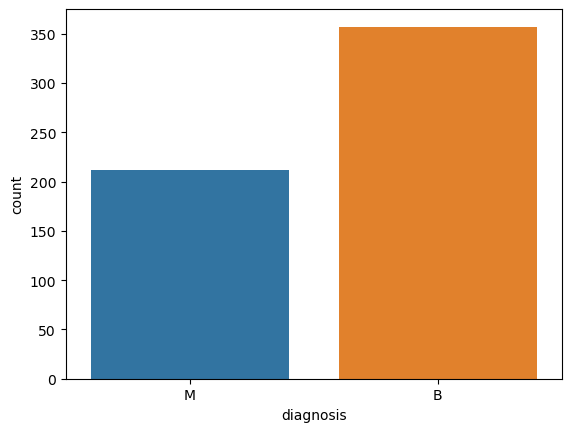

In [13]:
sns.countplot(data=df,x="diagnosis")

In [14]:
df["diagnosis"].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [15]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [16]:
# we can say that "B"('Benign') is more than "M"('Malignant') in the given dataset and it is a imbalanced data

In [17]:
#Label Encoding
df["diagnosis"]=df["diagnosis"].map({"M":0,"B":1})

In [18]:
df["diagnosis"]

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [19]:
x=df.drop("diagnosis",axis=1)
y=df["diagnosis"]

In [20]:
x.shape

(569, 30)

In [21]:
y.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

# train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [23]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [24]:
#Base model
model=SVC()
model.fit(x_train,y_train)
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)
Base_model_train_f1_score=f1_score(y_train,train_predict)
Base_model_test_f1_score=f1_score(y_test,test_predict)
print("The F1 score of the base model on the training set is",Base_model_train_f1_score)
print("The F1 score of the base model on the test set is",Base_model_test_f1_score)

The F1 score of the base model on the training set is 0.9378151260504202
The F1 score of the base model on the test set is 0.9459459459459458


# Hyperparameter tuning using GrindSearchCV

In [25]:
param_grid={"kernel":['linear', 'poly'],"C":[1,10]}

In [26]:
clf=GridSearchCV(estimator=SVC(),param_grid=param_grid,scoring="f1",cv=5)
clf.fit(x,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'poly']},
             scoring='f1')

In [27]:
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [28]:
model1=SVC(C=10,kernel="linear")
model1.fit(x_train,y_train)
train_predict=model1.predict(x_train)
test_predict=model1.predict(x_test)
train_f1_score=f1_score(y_train,train_predict)
test_f1_score=f1_score(y_test,test_predict)
print("The F1 score of the hyperparameter-tuned model on the training set is",train_f1_score)
print("The F1 score of the hyperparameter-tuned model on the test set is",test_f1_score)


The F1 score of the hyperparameter-tuned model on the training set is 0.9773123909249563
The F1 score of the hyperparameter-tuned model on the test set is 0.9726027397260274


In [29]:
score=pd.DataFrame({"Model":["SVC(Base Model)","SVC(Hyper parameter tuned Model)"],
                    "Training score":[Base_model_train_f1_score,train_f1_score],
                    "Test score":[Base_model_test_f1_score,test_f1_score]})

In [30]:
score

,Model,Training score,Test score
0,SVC(Base Model),0.937815,0.945946
1,SVC(Hyper parameter tuned Model),0.977312,0.972603


In [31]:
cv=cross_val_score(SVC(C=10,kernel="linear"),x,y,cv=5)

In [32]:
cv

array([0.93859649, 0.93859649, 0.97368421, 0.94736842, 0.96460177])

In [33]:
print("Cross_validation score",cv.mean())

Cross_validation score 0.9525694767893185


In [34]:
input_data1=(12.88,28.92,82.5,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,0.05708,0.2116,1.36,1.502,16.83,0.008412,0.02153,0.03898,0.00762,0.01695,0.002801,13.89,35.74,88.84,595.7,0.1227,0.162,0.2439,0.06493,0.2372,0.07242)
# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data1)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model1.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The Breast cancer is Malignant')
else:
    print('The Breast Cancer is Benign')

[1]
The Breast Cancer is Benign


C:\Users\deepa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [35]:
#Ensembel Technique

In [36]:
model2=RandomForestClassifier()
model2.fit(x_train,y_train)
rf_train_predict=model2.predict(x_train)
rf_test_predict=model2.predict(x_test)
rf_base_train_f1_score=f1_score(y_train,rf_train_predict)
rf_base_test_f1_score=f1_score(y_test,rf_test_predict)
print("The F1 score of the base model(RF) on the training set is",rf_base_train_f1_score)
print("The F1 score of the base model(RF) on the test set is",rf_base_test_f1_score)


The F1 score of the base model(RF) on the training set is 1.0
The F1 score of the base model(RF) on the test set is 0.9655172413793104


In [37]:
param_grid={"criterion":["gini", "entropy"],"max_depth":[None,5,10,15]}

In [38]:
clf=GridSearchCV(RandomForestClassifier(),param_grid=param_grid,scoring="f1",cv=5)

In [39]:
clf.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15]},
             scoring='f1')

In [40]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 15}

In [41]:
model3=RandomForestClassifier(n_estimators=100,criterion="entropy",max_depth=None)
model3.fit(x_train,y_train)
rf_train_predict=model3.predict(x_train)
rf_test_predict=model3.predict(x_test)
rf_train_f1_score=f1_score(y_train,rf_train_predict)
rf_test_f1_score=f1_score(y_test,rf_test_predict)
print("The F1 score of the base model(RF) on the training set is",rf_train_f1_score)
print("The F1 score of the base model(RF) on the test set is",rf_test_f1_score)

The F1 score of the base model(RF) on the training set is 1.0
The F1 score of the base model(RF) on the test set is 0.9655172413793104


In [42]:
cv=cross_val_score(RandomForestClassifier(n_estimators=100,criterion="entropy",max_depth=None),x,y,cv=5)

In [43]:
print("Cross_validation score",cv.mean())

Cross_validation score 0.9666045645086166


In [44]:
score1=pd.DataFrame({"Model":["RandomForest(Base Model)","RandomForest(Hyper parameter tuned Model)"],
                    "Training score":[rf_base_train_f1_score,rf_train_f1_score],
                    "Test score":[rf_base_test_f1_score,rf_test_f1_score]})

In [45]:
score1

,Model,Training score,Test score
0,RandomForest(Base Model),1.0,0.965517
1,RandomForest(Hyper parameter tuned Model),1.0,0.965517


In [46]:
input_data1=(12.88,28.92,82.5,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,0.05708,0.2116,1.36,1.502,16.83,0.008412,0.02153,0.03898,0.00762,0.01695,0.002801,13.89,35.74,88.84,595.7,0.1227,0.162,0.2439,0.06493,0.2372,0.07242)
# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data1)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model3.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The Breast cancer is Malignant')
else:
    print('The Breast Cancer is Benign')

[1]
The Breast Cancer is Benign


C:\Users\deepa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
